In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys

In [140]:
from scipy.stats import linregress 
from sklearn.linear_model import LinearRegression

In [152]:
reg = LinearRegression()

In [100]:
sys.maxsize

9223372036854775807

In [101]:
df = pd.read_csv('cost_revenue_dirty.csv')

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rank                   5391 non-null   int64 
 1   Release Date           5391 non-null   object
 2   Movie Title            5391 non-null   object
 3   Production Budget ($)  5391 non-null   object
 4   Worldwide Gross ($)    5391 non-null   object
 5   Domestic Gross ($)     5391 non-null   object
dtypes: int64(1), object(5)
memory usage: 252.8+ KB


In [103]:
df['Worldwide Gross ($)'].replace(r'\$','', regex=True, inplace=True)
df['Production Budget ($)'].replace(r'\$','', regex=True, inplace=True) 

In [104]:
df['Worldwide Gross ($)'].replace(r'\,','', regex=True, inplace=True)
df['Production Budget ($)'].replace(r'\,','', regex=True, inplace=True)

In [105]:
df['Worldwide Gross ($)']= df['Worldwide Gross ($)'].astype(np.int64)
df['Production Budget ($)']= df['Production Budget ($)'].astype(np.int64)

In [106]:
df_work = df[df['Worldwide Gross ($)'] > 0].iloc[:,3:-1].copy()

In [240]:
df_work

,Production Budget ($),Worldwide Gross ($)
0,110000,11000000
2,200000,8000000
3,100000,3000000
4,245000,22000000
5,3900000,9000000
...,...,...
5378,55000000,376856949
5379,40000000,166893990
5380,185000000,561137727
5381,175000000,140012608


In [196]:
X = np.array(df_work['Production Budget ($)'])
y = np.array(df_work['Worldwide Gross ($)'])

In [187]:
linregress(X,y)

LinregressResult(slope=3.1115091829361288, intercept=-7236192.729139656, rvalue=0.7413828536583329, pvalue=0.0, stderr=0.03970397811072372, intercept_stderr=2091133.0013747918)

In [201]:
linregress(X,y).slope

3.1115091829361288

In [202]:
linregress(X,y).intercept

-7236192.729139656

# SKLEARN

In [206]:
X = pd.DataFrame(df_work, columns=['Production Budget ($)'])
y = pd.DataFrame(df_work, columns=['Worldwide Gross ($)'])

In [181]:
reg.fit(X,y)

LinearRegression()

In [189]:
reg.coef_

array([[3.11150918]])

In [214]:
reg.score(X,y)

0.5496485356985729

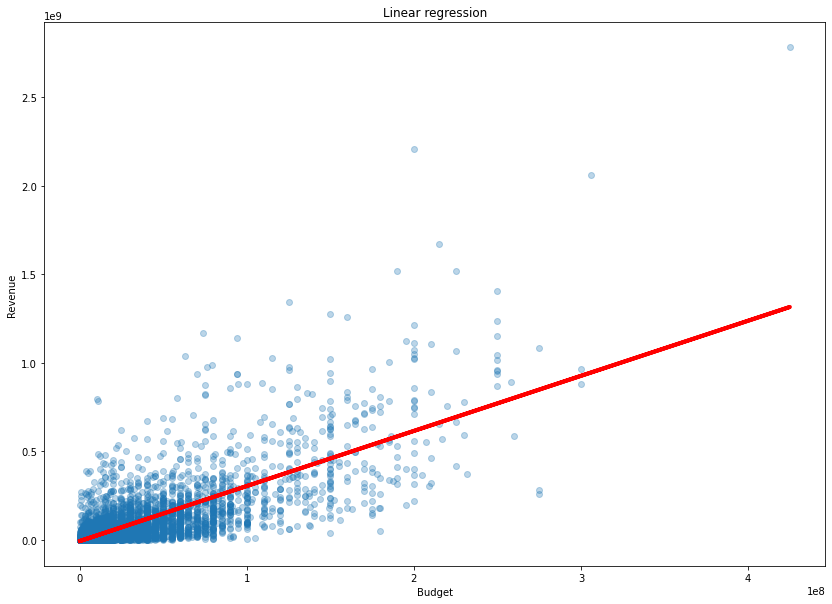

In [234]:
plt.figure(figsize=(14,10))
plt.scatter(X,y, alpha=0.3)
plt.plot(X, reg.predict(X), color='red', linewidth=4)
plt.title('Linear regression')
plt.xlabel ('Budget')
plt.ylabel ('Revenue')
plt.show()

In [242]:
reg.predict([[40000000]])

array([[1.17224175e+08]])